In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, plot_confusion_matrix, precision_score,roc_auc_score

In [2]:
df_train = pd.read_csv("/Users/ndaru/Documents/rai_projects/bri_hackathon/[2]/train.csv")
df_test = pd.read_csv("/Users/ndaru/Documents/rai_projects/bri_hackathon/[2]/test.csv")
df_train.tail(5)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,2012,5,5,4,0,4,1,85.94,1.0,0
11152,JG04,2.828427,PG04,2.121320,1.473092,RM_type_B,2,1980,Y,2,...,2009,14,5,7,0,2,0,79.99,1.0,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

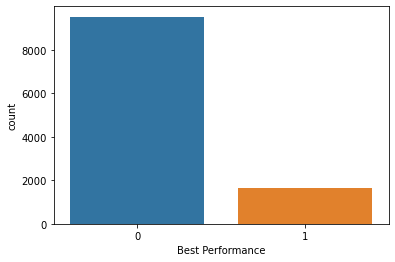

In [4]:
sns.countplot(data=df_train, x='Best Performance')

In [5]:
df_train.drop_duplicates(keep=False,inplace=True)

In [6]:
data_missing_value = df_train.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_train))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Achievement_above_100%_during3quartal,1,0.01
1,Last_achievement_%,1,0.01


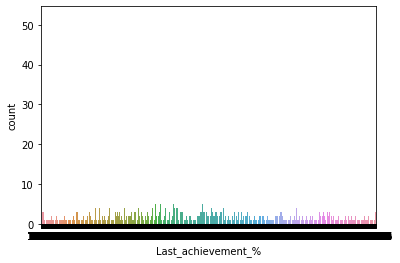

In [7]:
sns.countplot(data=df_train,x='Last_achievement_%')

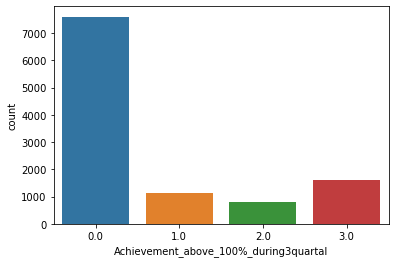

In [8]:
sns.countplot(data=df_train,x='Achievement_above_100%_during3quartal')

In [9]:
df_train['Last_achievement_%'].fillna(df_train['Last_achievement_%'].mean(), inplace=True)
df_train['Achievement_above_100%_during3quartal'].fillna(0, inplace=True)

In [10]:
data_missing_value = df_train.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_train))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage


In [11]:
display(list(df_train.select_dtypes(include=['object']).columns))
print()
(f"Data shape : {display(df_train.select_dtypes(include=['object']).shape)}")
print()
obj_type_df = df_train.select_dtypes(include=['object'])
obj_type_df.head(3)

['job_level',
 'person_level',
 'Employee_type',
 'marital_status_maried(Y/N)',
 'Education_level']

(11153, 5)

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
0,JG04,PG03,RM_type_A,Y,level_0
1,JG04,PG03,RM_type_A,Y,level_1
2,JG05,PG06,RM_type_C,Y,level_1


In [12]:
for col in obj_type_df: 
    print(col)
    print(f'Jumlah total data unique :',len(obj_type_df[col].unique()))
    print(obj_type_df[col].unique())
    print()

job_level
Jumlah total data unique : 3
['JG04' 'JG05' 'JG03']

person_level
Jumlah total data unique : 8
['PG03' 'PG06' 'PG05' 'PG04' 'PG07' 'PG02' 'PG01' 'PG08']

Employee_type
Jumlah total data unique : 3
['RM_type_A' 'RM_type_C' 'RM_type_B']

marital_status_maried(Y/N)
Jumlah total data unique : 2
['Y' 'N']

Education_level
Jumlah total data unique : 6
['level_0' 'level_1' 'level_2' 'level_3' 'level_4' 'level_5']



In [13]:
df_train["marital_status_maried(Y/N)"] = df_train["marital_status_maried(Y/N)"].apply(lambda x: 1 if x == 'Y' else 0)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  int64  
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [15]:
df_train['Education_level'] = df_train['Education_level'].apply(lambda x: x.replace("level_", "")).astype('int32')
display(f"Education_level : {df_train['Education_level'].unique()}")
print()
df_train['person_level'] = df_train['person_level'].apply(lambda x: x.replace("PG0", "")).astype('int32')
display(f"person_level : {df_train['person_level'].unique()}")
print()
df_train['job_level'] = df_train['job_level'].apply(lambda x: x.replace("JG0", "")).astype('int32')
display(f"job_level : {df_train['job_level'].unique()}")

'Education_level : [0 1 2 3 4 5]'

'person_level : [3 6 5 4 7 2 1 8]'

'job_level : [4 5 3]'

In [16]:
df_train['Employee_type'] = df_train['Employee_type'].apply(lambda x: 1 if x=='RM_type_A' else (2 if x=='RM_type_B' else 3))
display(f"Employee_type : {df_train['Employee_type'].unique()}")

'Employee_type : [1 3 2]'

## __df-test__

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              6000 non-null   object 
 1   job_duration_in_current_job_level      6000 non-null   float64
 2   person_level                           6000 non-null   object 
 3   job_duration_in_current_person_level   6000 non-null   float64
 4   job_duration_in_current_branch         6000 non-null   float64
 5   Employee_type                          6000 non-null   object 
 6   gender                                 6000 non-null   int64  
 7   age                                    6000 non-null   int64  
 8   marital_status_maried(Y/N)             6000 non-null   object 
 9   number_of_dependences                  6000 non-null   int64  
 10  Education_level                        6000 non-null   object 
 11  GPA 

In [18]:
display(list(df_test.select_dtypes(include=['object']).columns))
print()
(f"Data shape : {display(df_test.select_dtypes(include=['object']).shape)}")
print()
obj_type_dftest = df_test.select_dtypes(include=['object'])
obj_type_dftest.head(3)

['job_level',
 'person_level',
 'Employee_type',
 'marital_status_maried(Y/N)',
 'Education_level']

(6000, 5)

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
0,JG04,PG03,RM_type_A,N,level_3
1,JG04,PG03,RM_type_B,N,level_4
2,JG04,PG03,RM_type_A,Y,level_4


In [19]:
df_test["marital_status_maried(Y/N)"] = df_test["marital_status_maried(Y/N)"].apply(lambda x: 1 if x == 'Y' else 0)
display(f"marital_status_maried(Y/N) : {df_test['marital_status_maried(Y/N)'].unique()}")
print()
df_test['Education_level'] = df_test['Education_level'].apply(lambda x: x.replace("level_", "")).astype('int32')
display(f"Education_level : {df_test['Education_level'].unique()}")
print()
df_test['person_level'] = df_test['person_level'].apply(lambda x: x.replace("PG0", "")).astype('int32')
display(f"person_level : {df_test['person_level'].unique()}")
print()
df_test['job_level'] = df_test['job_level'].apply(lambda x: x.replace("JG0", "")).astype('int32')
display(f"job_level : {df_test['job_level'].unique()}")

'marital_status_maried(Y/N) : [0 1]'

'Education_level : [3 4 1 5 0 2]'

'person_level : [3 4 6 7 5 1 2]'

'job_level : [4 5 3 6]'

In [20]:
df_test['Employee_type'] = df_test['Employee_type'].apply(lambda x: 1 if x=='RM_type_A' else (2 if x=='RM_type_B' else 3))
display(f"Employee_type : {df_test['Employee_type'].unique()}")

'Employee_type : [1 2 3]'

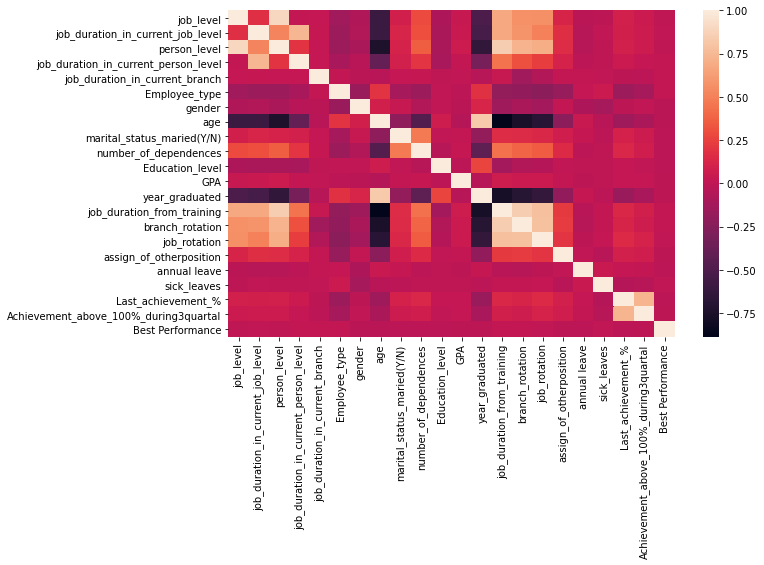

In [21]:

plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr())

In [22]:
# X = df_train.drop(columns=['Best Performance'])
y = df_train[['Best Performance']]

X = df_train['Last_achievement_%']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2021)

In [23]:
X_train.columns

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

In [ ]:
k = range(1,26)
testing_auc = []
training_auc = []
score = 0

for i in k:
    dtc_ = DecisionTreeClassifier(criterion='entropy', max_depth = i, random_state=2021)
    dtc_.fit(X_train, y_train)
    
    y_predict_train = dtc_.predict(X_train)
    training_auc.append(roc_auc_score(y_train, y_predict_train))
    
    y_predict_test = dtc_.predict(X_test)
    testing_auc.append(roc_auc_score(y_test, y_predict_test))
    
    acc_score = roc_auc_score(y_test, y_predict_test)
    
    if score < acc_score :
        score = acc_score
        best_k = i

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_auc, markers=True)
sns.lineplot(k, training_auc, markers=True)
plt.legend(['testing_auc','training_auc'])

In [ ]:
print('Best c :', best_k)
print('Best score :', score)

In [ ]:
k = range(1,26)
l = [50, 100, 150]
testing_auc = []
training_auc = []
score = 0

for i in k:
    for j in l:
        rf_ = RandomForestClassifier(criterion='entropy', max_depth = i, n_estimators=j, random_state=2021)
        rf_.fit(X_train, y_train)

        y_predict_train = rf_.predict(X_train)
        training_auc.append(roc_auc_score(y_train, y_predict_train))

        y_predict_test = rf_.predict(X_test)
        testing_auc.append(roc_auc_score(y_test, y_predict_test))

        acc_score = roc_auc_score(y_test, y_predict_test)

        if score < acc_score :
            score = acc_score
            best_k, best_l = i, j

In [ ]:
print('Best k :', best_k)
print('Best l :', best_l)
print('Best score :', score)

In [ ]:
# k = range(1,26)
l = [50, 100, 150, 200, 250]
testing_auc = []
training_auc = []
score = 0

# for i in k:
for j in l:
    rf_ = RandomForestClassifier(criterion='entropy', max_depth = 24, n_estimators=j, random_state=2021)
    rf_.fit(X_train, y_train)

    y_predict_train = rf_.predict(X_train)
    training_auc.append(roc_auc_score(y_train, y_predict_train))

    y_predict_test = rf_.predict(X_test)
    testing_auc.append(roc_auc_score(y_test, y_predict_test))

    acc_score = roc_auc_score(y_test, y_predict_test)

    if score < acc_score :
        score = acc_score
        best_k = j

In [ ]:
print('Best l :', best_l)
print('Best score :', score)

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(l, testing_auc, markers=True)
sns.lineplot(l, training_auc, markers=True)
plt.legend(['testing_auc','training_auc'])

In [ ]:
classifiers = [ LogisticRegression(max_iter=400),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                XGBClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
                PassiveAggressiveClassifier(),
                RidgeClassifier(),
#                 CatBoostClassifier(),
                GaussianNB()]

In [ ]:
log_cols=["Classifier","roc_auc_score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print()
    train_predictions = clf.predict(X_test)
    AUC_ROC_SCORE = roc_auc_score(y_test, train_predictions)
    print(f"{name} : \tAUC_ROC_SCORE : {AUC_ROC_SCORE}")
    
#     log_entry = pd.DataFrame([[name, AUC_ROC_SCORE]], columns=log_cols)
#     log = log.append(log_entry)

In [ ]:
model = classifiers[1]
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
classifiers[0].coef_